In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data=pd.read_csv("cleaned_data.csv")

In [3]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,872,27,12,0,0,0,0,0,0,0


In [4]:
#check  name of all columns in data 
list[data.columns]

list[Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')]

# Best day of the week to minimize delays

In [5]:
#create a new column adding the departure delay and arrival delay to the data's dataframe
data["sum of delays"]=data["DepDelay"]+data["ArrDelay"]

In [6]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,sum of delays
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,45,13,0,0,0,0,0,0,0,4.0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,27,19,0,0,0,0,0,0,0,-5.0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,4,11,0,0,0,0,0,0,0,-23.0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,16,10,0,0,0,0,0,0,0,-10.0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,27,12,0,0,0,0,0,0,0,-8.0


In [7]:
#group data in terms of week and get the average sum of delays of each group 
#Save the data to a varibale called dow_mean
dow_mean=data.groupby('DayOfWeek')["sum of delays"].mean().reset_index()

In [8]:
dow_mean["mean_delay_of_week"]=dow_mean["sum of delays"]

In [9]:
dow_mean=dow_mean[["DayOfWeek", "mean_delay_of_week"]]

In [10]:
dow_mean

,DayOfWeek,mean_delay_of_week
0,1,20.727735
1,2,15.727345
2,3,18.692676
3,4,24.364580
4,5,25.919547
5,6,14.098849
6,7,20.230781


<AxesSubplot:xlabel='DayOfWeek', ylabel='mean_delay_of_week'>

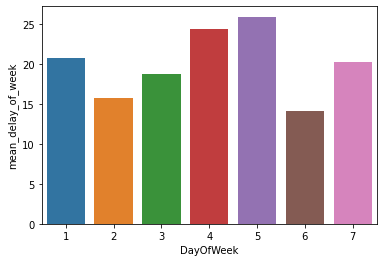

In [11]:
#since the minimum value is 14.0988 the best day of the week is Sataurday
#A graphical representation is shown below
sns.barplot(x="DayOfWeek" , y="mean_delay_of_week" , data = dow_mean)

In [12]:
#hence Saturday is the best day of the week 

# Best time of the year to minimize delays

In [13]:
#check the best time of the year by checking which month is the best
#group by the month and get the mean of the sum of delays as the method mentioned above for the week 
dom_mean=data.groupby('Month')["sum of delays"].mean().reset_index()


In [14]:
dom_mean["mean_delay_of_month"]=dom_mean["sum of delays"]

In [15]:
dom_mean[['Month','mean_delay_of_month']]

,Month,mean_delay_of_month
0,1,16.572149
1,2,22.043757
2,3,19.762064
3,4,16.572992
4,5,15.323722
5,6,28.572966
6,7,26.371262
7,8,22.239717
8,9,13.348714
9,10,17.732663


<AxesSubplot:xlabel='Month', ylabel='mean_delay_of_month'>

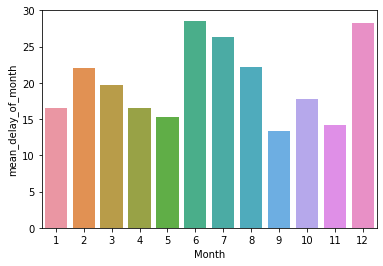

In [16]:
sns.barplot(x='Month',  y="mean_delay_of_month" , data=dom_mean)

In [17]:
#the month september has the minimum delay hence the best month to fly

# Best time of the day to fly to minimize delays

In [18]:
#Add a new coloumn named "CRSDep_interval"


In [19]:
def cleaner(value):
    if value < 600:
        return "Early Morning"
    elif 600<=value<1200:
        return "Morning"
    elif 1200<=value<1800:
        return "Evening"
    elif 1800<=value<=2359:
        return "Night"
    

In [20]:
data["CRSDep_interval"]=data["CRSDepTime"].apply(cleaner)

In [21]:
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,sum of delays,CRSDep_interval
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,13,0,0,0,0,0,0,0,4.0,Morning
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,19,0,0,0,0,0,0,0,-5.0,Morning
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,11,0,0,0,0,0,0,0,-23.0,Night
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,10,0,0,0,0,0,0,0,-10.0,Evening
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,12,0,0,0,0,0,0,0,-8.0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,...,17,0,0,0,0,0,0,0,6.0,Evening
14268924,7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,...,21,0,0,0,0,0,0,0,16.0,Night
14268925,7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,...,19,0,0,0,0,15,0,0,14.0,Morning
14268926,7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,...,14,0,0,0,0,0,0,36,74.0,Evening


In [22]:
dod_mean=data.groupby("CRSDep_interval")["sum of delays"].mean().reset_index()

In [23]:
dod_mean["mean_delay_of_day"]= dod_mean["sum of delays"]

In [24]:
dod_mean[["CRSDep_interval", "mean_delay_of_day"]]

,CRSDep_interval,mean_delay_of_day
0,Early Morning,4.273639
1,Evening,25.636952
2,Morning,8.597679
3,Night,32.813803


<AxesSubplot:xlabel='CRSDep_interval', ylabel='mean_delay_of_day'>

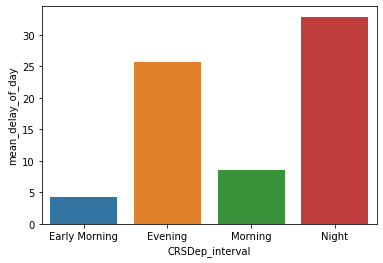

In [41]:
sns.barplot(x="CRSDep_interval" , y= "mean_delay_of_day" , data=dod_mean)

In [42]:
#hence the best time of the day to fly is early morning